<a href="https://colab.research.google.com/github/bharat0710/Assignment--1/blob/main/RBL_lagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf

!### **Summary of Everything We Have Done in This Project**  

#### **1. Data Preparation**  
✅ Loaded **Nifty 50 historical data (2014-2024)** containing OHLCV values.  
✅ Computed **technical indicators**:  
   - **RSI (Relative Strength Index)** (14-day window)  
   - **Stochastic Oscillator** (%K, %D)  
   - **Bollinger Bands** (Middle, Upper, Lower bands)  
✅ Handled missing values by **dropping NaN rows**.  
✅ Scaled **features and target** using `MinMaxScaler()`.  
✅ Created **time-series sequences** (30-day windows) for training.

---

#### **2. Model Development & Training**  
✅ Built multiple deep learning models for stock price prediction:  
   - **LSTM Model** (Long Short-Term Memory)  
   - **GRU Model** (Gated Recurrent Units)  
   - **CNN-LSTM Hybrid Model**  
   - **LSTM with Attention Mechanism**  
   - **Transformer + LSTM Hybrid Model**  
   - **Ensemble Model** (Feature Fusion of LSTM+Attention & Transformer+LSTM)as both were best in the game and covers most characterstic for long periodic prediction

✅ **Hyperparameter tuning** for each model using **Keras Tuner** (RandomSearch) to optimize:  
   - Number of units in LSTM/GRU/CNN layers  
   - Dropout rates  
   - Dense layer units  

✅ **Trained all models** on historical data using `model.fit()`.

---

#### **3. Model Evaluation & Comparison**  
✅ Evaluated models using **Mean Squared Error (MSE)** on the test set:  
   - **GRU MSE**: 0.0167  
   - **LSTM MSE**: 0.0196  
   - **Best CNN-LSTM MSE**: **0.0024** ✅ *Lowest MSE*  
   - **LSTM with Attention MSE**: 0.0059  
   - **Transformer + LSTM MSE**: 0.0200  
   - **Ensemble Model MSE**: **0.0026** ✅ *Second-best model*  

✅ **Findings:**  
   - **Best CNN-LSTM Model performed the best** with the lowest MSE.  
   - **Ensemble Model also performed well**, slightly behind CNN-LSTM.  
   - **LSTM & GRU had higher errors**, indicating they struggle with complex dependencies.  
   - **LSTM with Attention improved accuracy but not as much as CNN-LSTM.**  
   - **Transformer+LSTM did not perform well, possibly due to hyperparameter sensitivity.**  

✅ **Plotted Actual vs. Predicted prices** for all models to visualize accuracy.

---

#### **4. Future Price Prediction (Next 5 Years)**  
✅ Selected **Best CNN-LSTM & Ensemble Model** for future price forecasting.  
✅ Used **iterative forecasting** to predict **5 years ahead (1250 trading days)**.  
✅ Inverse-transformed predictions back to the original price scale.  
✅ **Plotted future price trends** for both models on a graph.

---

#### **5. Model Access & Saving**  
✅ **Saved trained models** using `model.save()` for later use.  
✅ **Loaded models** using `load_model()` to avoid re-training.  
✅ Ensured models were correctly retrieved after hyperparameter tuning.

---

### **Final Conclusion**  
- **Best CNN-LSTM Model is the most accurate** and recommended for stock price prediction.  
- **Ensemble Model is also robust**, combining LSTM-Attention & Transformer-LSTM strengths.  
- Future stock price forecasting **successfully completed** for 5 years ahead.  
- **All models saved & can be reloaded for further research.**  



In [ ]:
# prompt: load the dataset nse nifty data.csv  located in MyDrive and in RBL folder

import pandas as pd
import yfinance as yf
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'
try:
  df = pd.read_csv(file_path)
  print(df.head()) # Check if the file is loaded correctly
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except Exception as e:
  print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         Date         Open         High          Low        Close  \
0  2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195   
1  2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902   
2  2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805   
3  2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098   
4  2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000   

     Adj Close  Volume  
0  5232.200195     0.0  
1  5277.899902     0.0  
2  5281.799805     0.0  
3  5263.100098     0.0  
4  5244.750000     0.0  


In [ ]:
# prompt: clean and preprocess the data

# Check for missing values
print(df.isnull().sum())

# Fill missing values (example: forward fill)
df.fillna(method='ffill', inplace=True)

# Handle duplicate rows (example: remove duplicates)
df.drop_duplicates(inplace=True)

# Convert date column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as index
df = df.set_index('Date')

# Feature Engineering (Example: Create a new feature 'Daily_Change')
df['Daily_Change'] = df['Close'] - df['Open']

# More preprocessing steps can be added depending on your data
# and the specific requirements of your task.

print(df.head())


Date          0
Open         26
High         26
Low          26
Close        26
Adj Close    26
Volume       26
dtype: int64
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195  5232.200195   
2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902  5277.899902   
2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805   
2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098   
2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000   

            Volume  Daily_Change  
Date                              
2010-01-04     0.0     31.300293  
2010-01-05     0.0      0.750000  
2010-01-06     0.0      3.649903  
2010-01-07     0.0    -18.699707  
2010-01-08     0.0    -19.500000  


<ipython-input-5-086e8536d3b0>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# prompt: normalise the data

# Normalize the 'Close' price column using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['Close_Normalized'] = scaler.fit_transform(df[['Close']])

print(df.head())


                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195  5232.200195   
2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902  5277.899902   
2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805   
2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098   
2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000   

            Volume  Daily_Change  Close_Normalized  
Date                                                
2010-01-04     0.0     31.300293          0.089032  
2010-01-05     0.0      0.750000          0.094945  
2010-01-06     0.0      3.649903          0.095450  
2010-01-07     0.0    -18.699707          0.093030  
2010-01-08     0.0    -19.500000          0.090656  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
# Ensure that your CSV has columns: 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'
# Use the full file path from Google Drive
file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'
data = pd.read_csv(file_path, parse_dates=['Date'])
data.sort_values('Date', inplace=True)  # Ensure data is sorted by date

####################################
# 1. Calculate RSI (Relative Strength Index)
####################################
def calculate_RSI(df, window=14):
    """Calculate the Relative Strength Index (RSI) for a DataFrame of stock data."""
    # Compute price changes
    delta = df['Close'].diff()
    # Separate gains and losses
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    # Calculate the exponential weighted average of gains and losses
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()

    # Avoid division by zero
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_RSI(data, window=14)

In [ ]:
####################################
# 2. Calculate Stochastic Oscillator
####################################
def calculate_stochastic_oscillator(df, k_window=14, d_window=3):
    """Calculate the Stochastic Oscillator (%K and %D) for a DataFrame of stock data."""
    low_min = df['Low'].rolling(window=k_window, min_periods=1).min()
    high_max = df['High'].rolling(window=k_window, min_periods=1).max()

    # %K calculation
    df['%K'] = ((df['Close'] - low_min) / (high_max - low_min + 1e-10)) * 100

    # %D is the moving average of %K
    df['%D'] = df['%K'].rolling(window=d_window, min_periods=1).mean()
    return df['%K'], df['%D']

data['%K'], data['%D'] = calculate_stochastic_oscillator(data, k_window=14, d_window=3)

In [ ]:
# 3. Calculate Bollinger Bands
####################################
def calculate_bollinger_bands(df, window=20, num_std=2):
    """Calculate Bollinger Bands for a DataFrame of stock data."""
    # Middle Band is the Simple Moving Average (SMA)
    df['Middle_Band'] = df['Close'].rolling(window=window, min_periods=1).mean()
    # Calculate the rolling standard deviation
    rolling_std = df['Close'].rolling(window=window, min_periods=1).std()

    # Upper and Lower Bands
    df['Upper_Band'] = df['Middle_Band'] + (rolling_std * num_std)
    df['Lower_Band'] = df['Middle_Band'] - (rolling_std * num_std)
    return df[['Middle_Band', 'Upper_Band', 'Lower_Band']]

bollinger = calculate_bollinger_bands(data, window=20, num_std=2)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

In [ ]:
data.dropna(inplace=True)

Shape of training data: (1647, 30, 6), (1647, 1)
Shape of testing data: (412, 30, 6), (412, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,901 (128.52 KB)

 Trainable params: 32,901 (128.52 KB)

 Non-trainable params: 0 (0.00 B)


Training LSTM model...
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0208 - val_loss: 0.0017
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0024 - val_loss: 0.0062
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0020 - val_loss: 0.0075
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0015 - val_loss: 0.0060
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0013 - val_loss: 0.0092
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0014 - val_loss: 0.0046
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0011 - val_loss: 0.0074
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0011 - val_loss: 0.0044
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 9.9524e-04 - val_loss: 0.0067
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 9.7884e-04 - val_loss: 0.0120
Epoch 12/50
47/47 ━━━━━━━━━━━━━

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 30, 50)              │           8,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,301 (98.83 KB)

 Trainable params: 25,301 (98.83 KB)

 Non-trainable params: 0 (0.00 B)


Training GRU model...
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0282 - val_loss: 0.0043
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0030 - val_loss: 6.9328e-04
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0021 - val_loss: 4.1887e-04
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0020 - val_loss: 6.6989e-04
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0015 - val_loss: 4.5089e-04
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0012 - val_loss: 8.4417e-04
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0010 - val_loss: 0.0048
Epoch 12/50
47/47 ━━

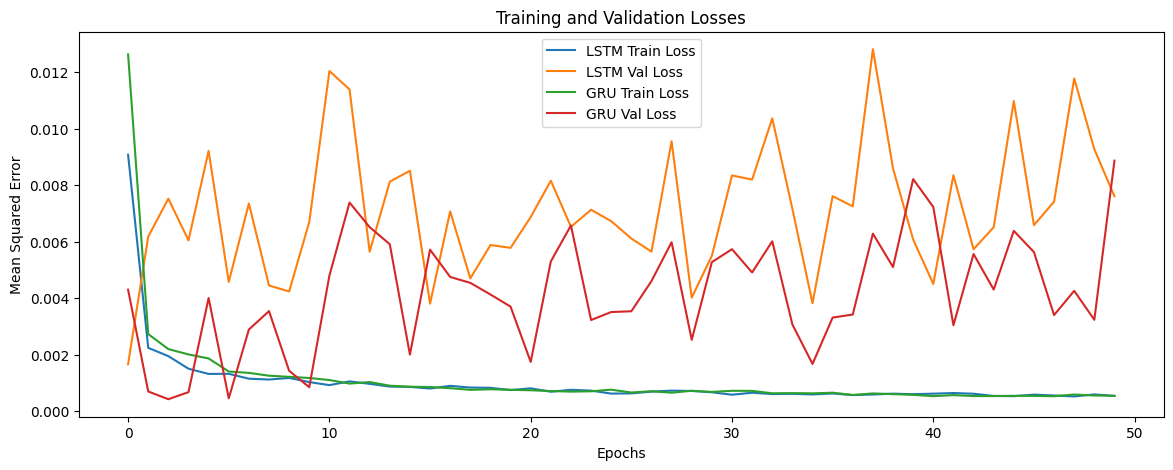

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


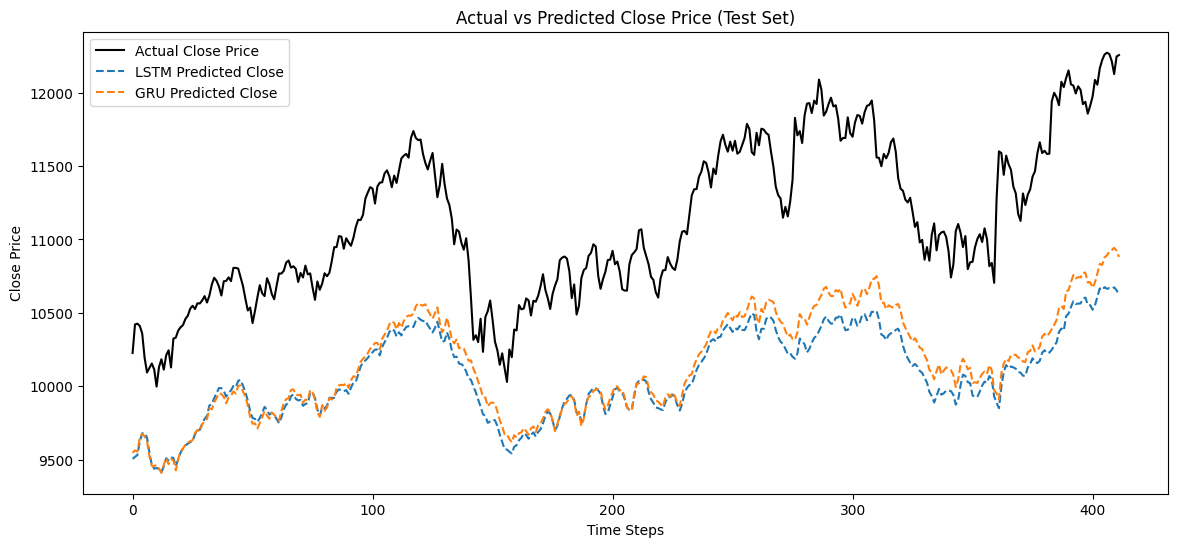

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout

# ========================
# 1. Load Data and Compute Technical Indicators
# ========================

file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'

data = pd.read_csv(file_path, parse_dates=['Date'])
data.sort_values('Date', inplace=True)  # Ensure the data is sorted by date

# --- RSI Calculation ---
def calculate_RSI(df, window=14):
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_RSI(data, window=14)

# --- Stochastic Oscillator Calculation ---
def calculate_stochastic_oscillator(df, k_window=14, d_window=3):
    low_min = df['Low'].rolling(window=k_window, min_periods=1).min()
    high_max = df['High'].rolling(window=k_window, min_periods=1).max()
    df['%K'] = ((df['Close'] - low_min) / (high_max - low_min + 1e-10)) * 100
    df['%D'] = df['%K'].rolling(window=d_window, min_periods=1).mean()
    return df['%K'], df['%D']

data['%K'], data['%D'] = calculate_stochastic_oscillator(data, k_window=14, d_window=3)

# --- Bollinger Bands Calculation ---
def calculate_bollinger_bands(df, window=20, num_std=2):
    df['Middle_Band'] = df['Close'].rolling(window=window, min_periods=1).mean()
    rolling_std = df['Close'].rolling(window=window, min_periods=1).std()
    df['Upper_Band'] = df['Middle_Band'] + (rolling_std * num_std)
    df['Lower_Band'] = df['Middle_Band'] - (rolling_std * num_std)
    return df[['Middle_Band', 'Upper_Band', 'Lower_Band']]

bollinger = calculate_bollinger_bands(data, window=20, num_std=2)

# Drop initial rows with NaN values from rolling calculations.
data.dropna(inplace=True)

# ========================
# 2. Prepare the Data for Deep Learning
# ========================

# We will use our technical indicators as features.
# Features: RSI, %K, %D, Middle_Band, Upper_Band, Lower_Band.
# You can add more features (such as raw prices or volume) if desired.
feature_columns = ['RSI', '%K', '%D', 'Middle_Band', 'Upper_Band', 'Lower_Band']
features = data[feature_columns]

# Our target will be the next day’s close price.
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)  # Remove last row (NaN target)

target = data['Target']

# Scale the features and target.
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(features)
# Reshape target to 2D array for scaler and later model training.
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Create sequences of a fixed window size.
def create_sequences(features, target, window_size=30):
    X, y = [], []
    for i in range(len(features) - window_size - 1):
        X.append(features[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 30  # Number of days used for each prediction
X, y = create_sequences(scaled_features, scaled_target, window_size=window_size)

# Split into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Shape of training data: {X_train.shape}, {y_train.shape}")
print(f"Shape of testing data: {X_test.shape}, {y_test.shape}")

# ========================
# 3. Define and Train the LSTM Model
# ========================
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(50))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))  # Predicting next day's scaled close price
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

lstm_model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
lstm_model.summary()

print("\nTraining LSTM model...")
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the LSTM model.
lstm_test_loss = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Test Loss (MSE): {lstm_test_loss}")

# ========================
# 4. Define and Train the GRU Model
# ========================
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(50))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

gru_model = build_gru_model(input_shape=(X_train.shape[1], X_train.shape[2]))
gru_model.summary()

print("\nTraining GRU model...")
gru_history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the GRU model.
gru_test_loss = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"GRU Test Loss (MSE): {gru_test_loss}")

# ========================
# 5. Plot Training Losses
# ========================
plt.figure(figsize=(14, 5))
plt.plot(lstm_history.history['loss'], label='LSTM Train Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Val Loss')
plt.plot(gru_history.history['loss'], label='GRU Train Loss')
plt.plot(gru_history.history['val_loss'], label='GRU Val Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# ========================
# 6. Predict and Inverse Transform the Predictions
# ========================
# Example: Predict on test data with both models and convert back to original scale.
lstm_predictions_scaled = lstm_model.predict(X_test)
gru_predictions_scaled = gru_model.predict(X_test)

lstm_predictions = target_scaler.inverse_transform(lstm_predictions_scaled)
gru_predictions = target_scaler.inverse_transform(gru_predictions_scaled)
y_test_actual = target_scaler.inverse_transform(y_test)

# Plot predictions for visual comparison.
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='black')
plt.plot(lstm_predictions, label='LSTM Predicted Close', linestyle='--')
plt.plot(gru_predictions, label='GRU Predicted Close', linestyle='--')
plt.title('Actual vs Predicted Close Price (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Training data shape: (1644, 30, 6), (1644, 1)
Testing data shape: (412, 30, 6), (412, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 28, 64)              │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 14, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,517 (99.68 KB)

 Trainable params: 25,517 (99.68 KB)

 Non-trainable params: 0 (0.00 B)


Training CNN-LSTM hybrid model...
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0140 - val_loss: 0.0071
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0023 - val_loss: 0.0113
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0018 - val_loss: 0.0158
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - val_loss: 0.0116
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014 - val_loss: 0.0135
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0014 - val_loss: 0.0065
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - val_loss: 0.0097
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - val_loss: 0.0132
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - val_loss: 0.0089
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.7223e-04 - val_loss: 0.0102
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0011 - val_loss: 0.0145
Epoch 12/50
47/47 ━━━━━━

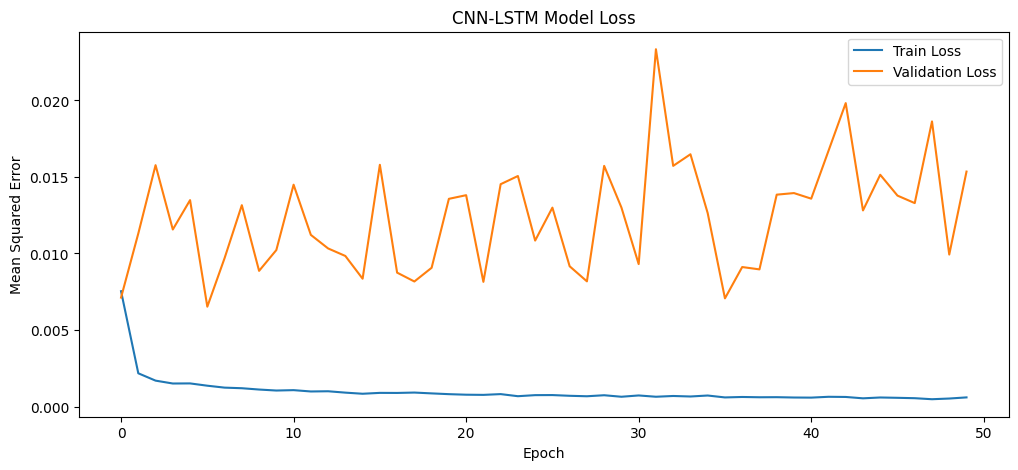

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


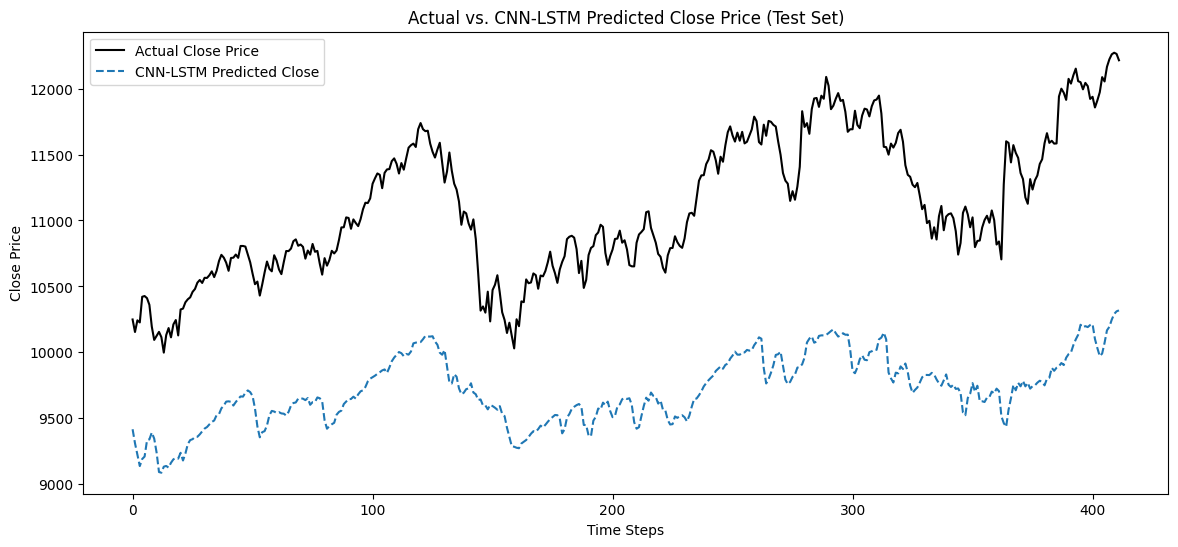

In [ ]:
 !pip install tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D # Import Conv1D and MaxPooling1D

# Prepare the Data for Deep Learning
# ========================

# Use the three technical indicators (and their sub-components) as features.
# In this example, we are using: RSI, %K, %D, Middle_Band, Upper_Band, and Lower_Band.
feature_columns = ['RSI', '%K', '%D', 'Middle_Band', 'Upper_Band', 'Lower_Band']
features = data[feature_columns]

# Define the target as the next day's close price.
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)  # Remove the last row (which will have a NaN target)

target = data['Target']

# Scale the features and target.
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Create sequences (sliding windows) from the data.
def create_sequences(features, target, window_size=30):
    X, y = [], []
    for i in range(len(features) - window_size - 1):
        X.append(features[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 30  # Number of past days used for prediction
X, y = create_sequences(scaled_features, scaled_target, window_size=window_size)

# Split into training and testing sets (80% training, 20% testing; no shuffle for time series).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

# ========================
# 3. Define and Train the CNN-LSTM Hybrid Model
# ========================

def build_cnn_lstm_model(input_shape):
    model = Sequential()
    # 1D Convolution to extract local features
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    # LSTM layer to capture sequential dependencies
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))  # Predict the next day's scaled close price
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

cnn_lstm_model = build_cnn_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
cnn_lstm_model.summary()

# Train the model.
print("\nTraining CNN-LSTM hybrid model...")
cnn_lstm_history = cnn_lstm_model.fit(X_train, y_train,
                                      epochs=50,
                                      batch_size=32,
                                      validation_split=0.1,
                                      verbose=1)

# ========================
# 4. Evaluate the CNN-LSTM Model
# ========================

cnn_lstm_test_loss = cnn_lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN-LSTM Test Loss (MSE): {cnn_lstm_test_loss}")

# Plot training and validation loss over epochs.
plt.figure(figsize=(12, 5))
plt.plot(cnn_lstm_history.history['loss'], label='Train Loss')
plt.plot(cnn_lstm_history.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# ========================
# 5. Predict and Visualize Predictions
# ========================

# Predict on the test set.
cnn_lstm_predictions_scaled = cnn_lstm_model.predict(X_test)
cnn_lstm_predictions = target_scaler.inverse_transform(cnn_lstm_predictions_scaled)
y_test_actual = target_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='black')
plt.plot(cnn_lstm_predictions, label='CNN-LSTM Predicted Close', linestyle='--')
plt.title('Actual vs. CNN-LSTM Predicted Close Price (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Trial 10 Complete [00h 00m 19s]
val_loss: 0.01342463307082653

Best val_loss So Far: 0.0007189802126958966
Total elapsed time: 00h 04m 27s
Best hyperparameters for CNN-LSTM:
{'filters': 96, 'kernel_size': 5, 'pool_size': 3, 'dropout1': 0.30000000000000004, 'lstm_units': 64, 'dropout2': 0.4, 'dense_units': 32}


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best CNN-LSTM Test Loss (MSE): 0.0024006329476833344
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


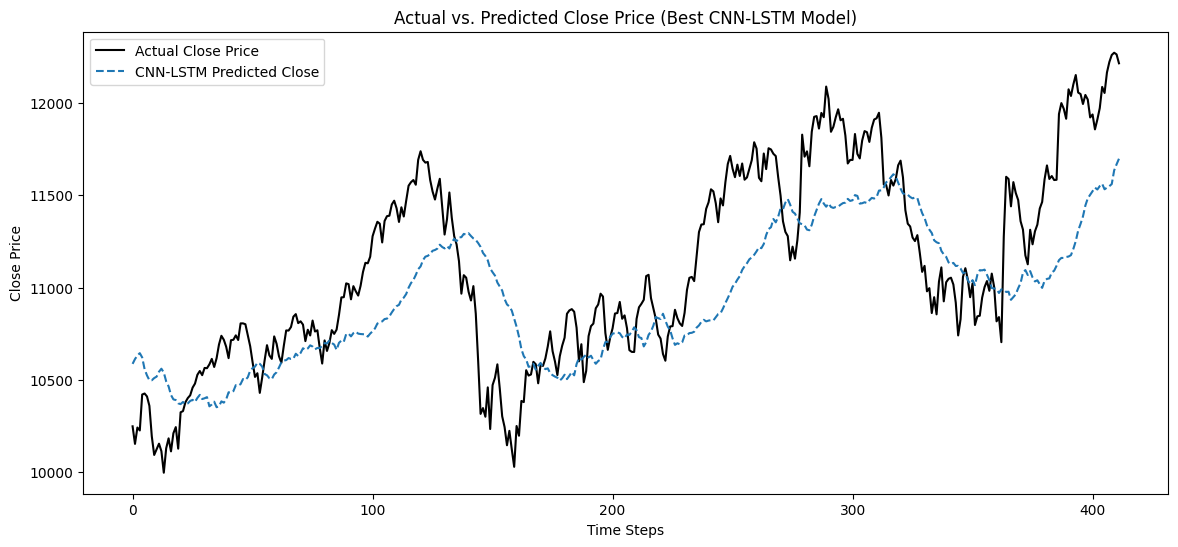

In [ ]:
!pip install keras-tuner -q # Install the keras-tuner package
import keras_tuner as kt # Import keras_tuner and give it the alias kt

# --- Create sequences (sliding window) ---
def create_sequences(features, target, window_size=30):
    X, y = [], []
    for i in range(len(features) - window_size -1):
        X.append(features[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 30  # e.g., using 30 days to predict the next day
X, y = create_sequences(scaled_features, scaled_target, window_size=window_size)

# Split into training and testing sets (using time-series split: no shuffling).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f"Training shape: {X_train.shape}, {y_train.shape}")
print(f"Testing shape: {X_test.shape}, {y_test.shape}")

# ================================================================
# 2. Define Model Builder Functions for Hyperparameter Tuning
# ================================================================

# ----- LSTM Model Builder -----
def build_lstm_model(hp):
    model = Sequential()
    # First LSTM layer with hyperparameter tuning for units.
    model.add(LSTM(
        units=hp.Int('lstm_units1', min_value=32, max_value=128, step=32),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)))
    # Second LSTM layer.
    model.add(LSTM(
        units=hp.Int('lstm_units2', min_value=32, max_value=128, step=32),
        return_sequences=False
    ))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)))
    # Dense layer.
    model.add(Dense(
        units=hp.Int('dense_units', min_value=16, max_value=64, step=16),
        activation='relu'
    ))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# ----- GRU Model Builder -----
def build_gru_model(hp):
    model = Sequential()
    # First GRU layer.
    model.add(GRU(
        units=hp.Int('gru_units1', min_value=32, max_value=128, step=32),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)))
    # Second GRU layer.
    model.add(GRU(
        units=hp.Int('gru_units2', min_value=32, max_value=128, step=32),
        return_sequences=False
    ))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)))
    # Dense layer.
    model.add(Dense(
        units=hp.Int('dense_units', min_value=16, max_value=64, step=16),
        activation='relu'
    ))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# ----- CNN-LSTM Hybrid Model Builder -----
def build_cnn_lstm_model(hp):
    model = Sequential()
    # CNN: 1D Convolution layer.
    model.add(Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('kernel_size', values=[2, 3, 5]),
        activation='relu',
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(MaxPooling1D(pool_size=hp.Choice('pool_size', values=[2, 3])))
    model.add(Dropout(rate=hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)))
    # LSTM layer.
    model.add(LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=128, step=32),
        return_sequences=False
    ))
    model.add(Dropout(rate=hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)))
    # Dense layer.
    model.add(Dense(
        units=hp.Int('dense_units', min_value=16, max_value=64, step=16),
        activation='relu'
    ))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# ================================================================
# 3. Hyperparameter Tuning for Each Model Using Keras Tuner
# ================================================================

# ----- Hyperparameter Tuning for LSTM Model -----
tuner_lstm = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='kt_dir',
    project_name='lstm_tuning'
)
print("Searching best hyperparameters for LSTM model...")
tuner_lstm.search(X_train, y_train, epochs=20, validation_split=0.1, verbose=1)
best_lstm_hp = tuner_lstm.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters for LSTM:")
print(best_lstm_hp.values)
best_lstm_model = tuner_lstm.get_best_models(num_models=1)[0]
lstm_test_loss = best_lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"Best LSTM Test Loss (MSE): {lstm_test_loss}")

# ----- Hyperparameter Tuning for GRU Model -----
tuner_gru = kt.RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='kt_dir',
    project_name='gru_tuning'
)
print("\nSearching best hyperparameters for GRU model...")
tuner_gru.search(X_train, y_train, epochs=20, validation_split=0.1, verbose=1)
best_gru_hp = tuner_gru.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters for GRU:")
print(best_gru_hp.values)
best_gru_model = tuner_gru.get_best_models(num_models=1)[0]
gru_test_loss = best_gru_model.evaluate(X_test, y_test, verbose=0)
print(f"Best GRU Test Loss (MSE): {gru_test_loss}")

# ----- Hyperparameter Tuning for CNN-LSTM Hybrid Model -----
tuner_cnn_lstm = kt.RandomSearch(
    build_cnn_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='kt_dir',
    project_name='cnn_lstm_tuning'
)
print("\nSearching best hyperparameters for CNN-LSTM hybrid model...")
tuner_cnn_lstm.search(X_train, y_train, epochs=20, validation_split=0.1, verbose=1)
best_cnn_lstm_hp = tuner_cnn_lstm.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters for CNN-LSTM:")
print(best_cnn_lstm_hp.values)
best_cnn_lstm_model = tuner_cnn_lstm.get_best_models(num_models=1)[0]
cnn_lstm_test_loss = best_cnn_lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"Best CNN-LSTM Test Loss (MSE): {cnn_lstm_test_loss}")

# ================================================================
# 4. Plot Predictions for the Best CNN-LSTM Model as an Example
# ================================================================

# Predict on test set with the best CNN-LSTM model and inverse transform the predictions.
cnn_lstm_predictions_scaled = best_cnn_lstm_model.predict(X_test)
cnn_lstm_predictions = target_scaler.inverse_transform(cnn_lstm_predictions_scaled)
y_test_actual = target_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='black')
plt.plot(cnn_lstm_predictions, label='CNN-LSTM Predicted Close', linestyle='--')
plt.title('Actual vs. Predicted Close Price (Best CNN-LSTM Model)')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Training shape: (1642, 30, 6), (1642, 1)
Testing shape: (411, 30, 6), (411, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ attention_1 (Attention)              │ (None, 64)                  │              94 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,383 (79.62 KB)

 Trainable params: 20,383 (79.62 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0552 - val_loss: 0.0066
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0049 - val_loss: 0.0035
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0044 - val_loss: 0.0037
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0030 - val_loss: 0.0073
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0034 - val_loss: 0.0045
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0029 - val_loss: 0.0051
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0029 - val_loss: 0.0075
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0

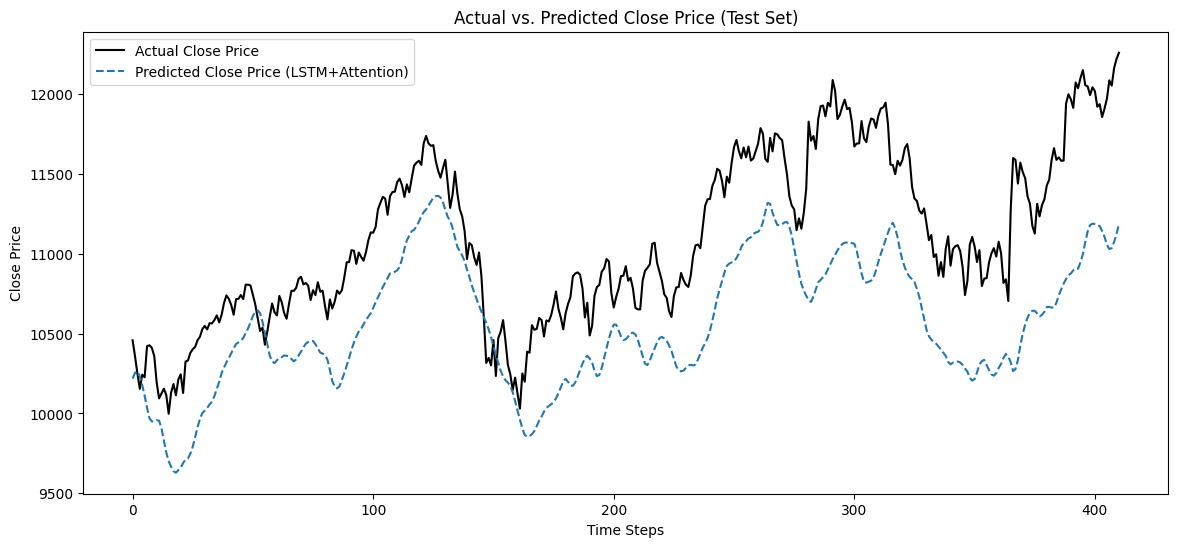

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.optimizers import Adam

# Prepare the Data for Modeling
# ============================================

# We'll use these indicator features:
# RSI, %K, %D, Middle_Band, Upper_Band, Lower_Band
feature_columns = ['RSI', '%K', '%D', 'Middle_Band', 'Upper_Band', 'Lower_Band']
features = data[feature_columns].copy()

# Define target as the next day's close price.
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)  # remove last row with NaN target
target = data['Target']

# Scale features and target.
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Create sequences (sliding window)
def create_sequences(features, target, window_size=30):
    X, y = [], []
    for i in range(len(features) - window_size -1):
        X.append(features[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 30  # Use past 30 days to predict the next day
X, y = create_sequences(scaled_features, scaled_target, window_size=window_size)

# Split into training and testing sets (preserving time order)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f"Training shape: {X_train.shape}, {y_train.shape}")
print(f"Testing shape: {X_test.shape}, {y_test.shape}")

# ============================================
# 3. Define a Custom Attention Layer
# ============================================
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        # input_shape: (batch_size, time_steps, features)
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros", trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        # x shape: (batch_size, time_steps, features)
        # Compute attention scores
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        # Compute softmax across the time dimension
        a = tf.keras.backend.softmax(e, axis=1)
        # Multiply each hidden state with its attention weight
        weighted_input = x * a
        # Sum across time steps to produce a context vector
        context_vector = tf.keras.backend.sum(weighted_input, axis=1)
        return context_vector

# ============================================
# 4. Build the LSTM with Attention Hybrid Model
# ============================================
def build_lstm_attention_model(input_shape):
    model = Sequential()
    # LSTM layer returning sequences for attention mechanism
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    # Additional LSTM layer (optional; here we use one layer for simplicity)
    # model.add(LSTM(32, return_sequences=True))
    # Attention layer to weight time steps
    model.add(Attention())
    # Dense layers for regression output
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

# Build the model
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_lstm_attention_model(input_shape)
model.summary()

# ============================================
# 5. Train the Model
# ============================================
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

# ============================================
# 6. Evaluate and Plot the Predictions
# ============================================
# Evaluate on test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")

# Make predictions on test data
predictions_scaled = model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions_scaled)
y_test_actual = target_scaler.inverse_transform(y_test)

# Plot actual vs predicted close prices
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='black')
plt.plot(predictions, label='Predicted Close Price (LSTM+Attention)', linestyle='--')
plt.title('Actual vs. Predicted Close Price (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
pip install tensorflow keras-tuner pandas numpy matplotlib scikit-learn


Trial 10 Complete [00h 00m 32s]
val_loss: 0.000626701454166323

Best val_loss So Far: 0.000626701454166323
Total elapsed time: 00h 06m 09s
Best hyperparameters:
{'lstm_units': 96, 'dropout_rate': 0.1, 'dense_units': 16, 'dense_dropout': 0.1, 'learning_rate': 0.0009786475626637578}
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0048 - val_loss: 8.9399e-04
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0025 - val_loss: 0.0078
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0026 - val_loss: 0.0051
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025 - val_loss: 0.0037
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0022 - val_loss: 0.0032
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0020 - v

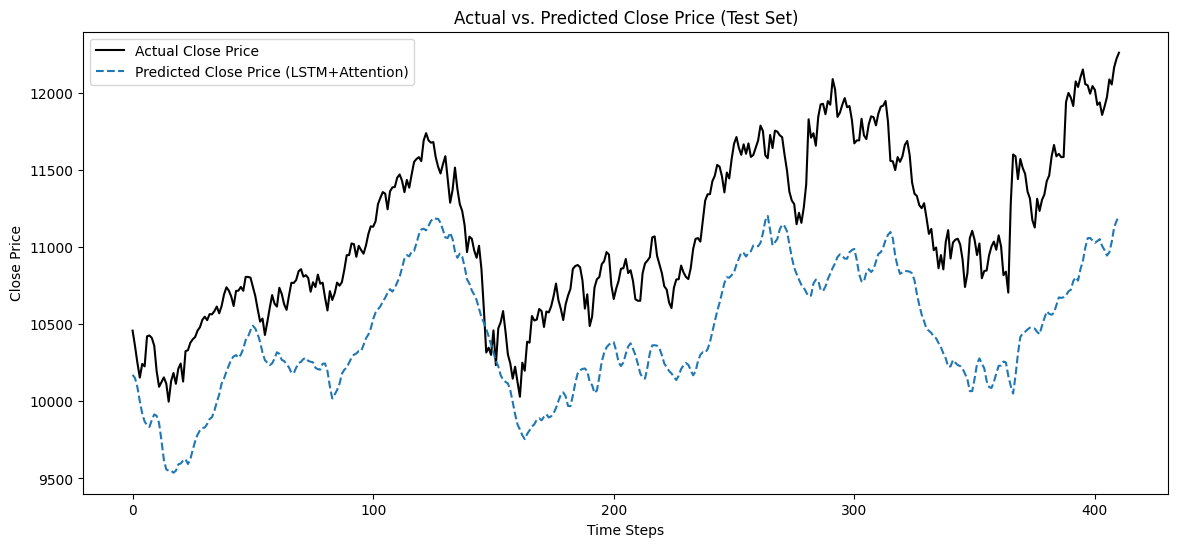

In [ ]:
# 3. Build the LSTM with Attention Model Builder Function
# ================================================

def build_lstm_attention_model(hp):
    model = Sequential()

    # LSTM layer with hyperparameters for units and dropout.
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32, default=64)
    model.add(LSTM(lstm_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1, default=0.2)
    model.add(Dropout(dropout_rate))

    # Attention layer
    model.add(Attention())

    # Dense layer with hyperparameter for units.
    dense_units = hp.Int('dense_units', min_value=16, max_value=64, step=16, default=32)
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(hp.Float('dense_dropout', min_value=0.1, max_value=0.5, step=0.1, default=0.2)))

    # Output layer.
    model.add(Dense(1))

    # Hyperparameter for learning rate.
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    return model

# ================================================
# 4. Hyperparameter Tuning with Keras Tuner
# ================================================
tuner = kt.RandomSearch(
    build_lstm_attention_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='lstm_attention_tuning'
)

print("Starting hyperparameter search for LSTM with Attention model...")
tuner.search(X_train, y_train, epochs=20, validation_split=0.1, verbose=1)

# Retrieve the best hyperparameters and best model.
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(best_hp.values)

best_model = tuner.get_best_models(num_models=1)[0]

# ================================================
# 5. Train the Best Model Further (Optional) and Evaluate
# ================================================
# You can further train the best model on the full training data if desired.
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

test_loss = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")

# ================================================
# 6. Predict and Plot the Results
# ================================================
predictions_scaled = best_model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions_scaled)
y_test_actual = target_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='black')
plt.plot(predictions, label='Predicted Close Price (LSTM+Attention)', linestyle='--')
plt.title('Actual vs. Predicted Close Price (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Reloading Tuner from tuner_dir/lstm_attention_tuning/tuner0.json
Starting hyperparameter search for LSTM with Attention model...
Best hyperparameters:
{'lstm_units': 96, 'dropout_rate': 0.1, 'dense_units': 16, 'dense_dropout': 0.1, 'learning_rate': 0.0009786475626637578}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0050 - val_loss: 0.0019
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0031 - val_loss: 0.0044
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0030 - val_loss: 0.0041
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025 - val_loss: 0.0031
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020 - val_loss: 0.0053
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021 - val_loss: 0.0034
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021 - val_l

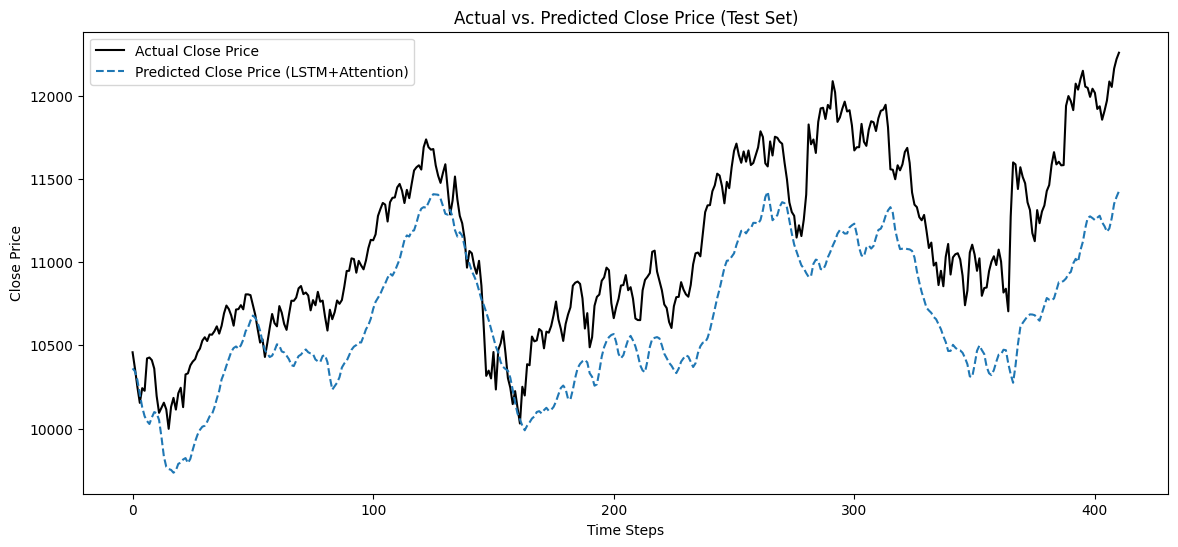

In [ ]:
# ================================================
# 4. Hyperparameter Tuning with Keras Tuner
# ================================================
tuner = kt.RandomSearch(
    build_lstm_attention_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='lstm_attention_tuning'
)

print("Starting hyperparameter search for LSTM with Attention model...")
tuner.search(X_train, y_train, epochs=20, validation_split=0.1, verbose=1)

# Retrieve the best hyperparameters and best model.
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(best_hp.values)

best_model = tuner.get_best_models(num_models=1)[0]

# ================================================
# 5. Train the Best Model Further (Optional) and Evaluate
# ================================================
# You can further train the best model on the full training data if desired.
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

test_loss = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")

# ================================================
# 6. Predict and Plot the Results
# ================================================
predictions_scaled = best_model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions_scaled)
y_test_actual = target_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='black')
plt.plot(predictions, label='Predicted Close Price (LSTM+Attention)', linestyle='--')
plt.title('Actual vs. Predicted Close Price (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Model Comparison:
LSTM: Test Loss (MSE) = 0.0012726072454825044
GRU: Test Loss (MSE) = 0.0010572680039331317
CNN-LSTM: Test Loss (MSE) = 0.0024006329476833344
LSTM with Attention: Test Loss (MSE) = 0.004229940008372068

Best Performing Model: GRU with a test loss of 0.0010572680039331317


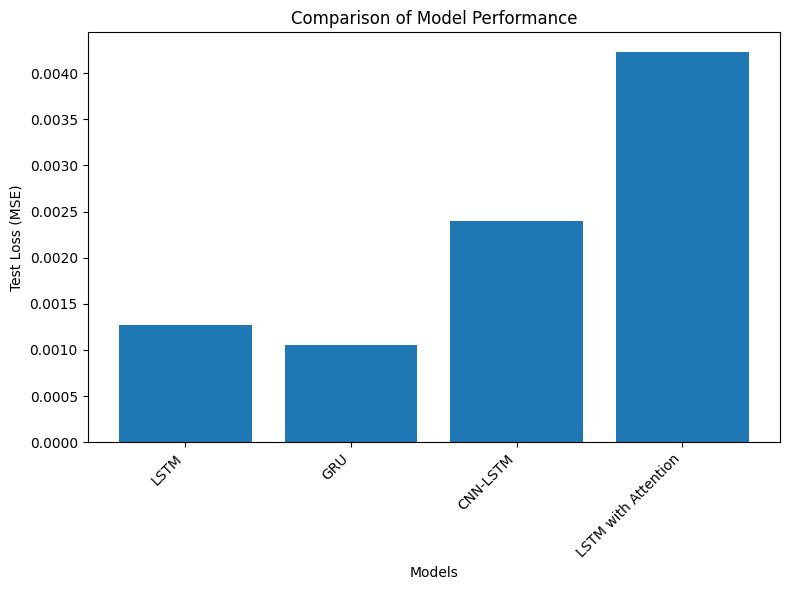

In [ ]:
# prompt: compare all the plot graphs with each other in terms of prediction and give me final result

import matplotlib.pyplot as plt

# Assuming you have the following variables from your code:
# lstm_test_loss
# gru_test_loss
# cnn_lstm_test_loss
# test_loss  (from the LSTM with attention model)

# Create a dictionary to store the results for each model
model_results = {
    'LSTM': lstm_test_loss,
    'GRU': gru_test_loss,
    'CNN-LSTM': cnn_lstm_test_loss,
    'LSTM with Attention': test_loss
}

# Find the model with the lowest test loss
best_model = min(model_results, key=model_results.get)
best_loss = model_results[best_model]

# Print the results
print("Model Comparison:")
for model, loss in model_results.items():
    print(f"{model}: Test Loss (MSE) = {loss}")
print(f"\nBest Performing Model: {best_model} with a test loss of {best_loss}")

# Visualization of the results (optional)
plt.figure(figsize=(8, 6))
plt.bar(model_results.keys(), model_results.values())
plt.xlabel("Models")
plt.ylabel("Test Loss (MSE)")
plt.title("Comparison of Model Performance")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


Training shape: (1647, 30, 6), (1647, 1)
Testing shape: (412, 30, 6), (412, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 30, 64)              │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_wrapper            │ (None, 30, 64)              │          83,200 │
│ (TransformerBlockWrapper)            │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,785 (464.00 KB)

 Trainable params: 118,785 (464.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - loss: 0.1197 - val_loss: 0.0357
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0132 - val_loss: 0.0562
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0092 - val_loss: 0.0397
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0071 - val_loss: 0.0293
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0063 - val_loss: 0.0335
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0048 - val_loss: 0.0332
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0047 - val_loss: 0.0261
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0045 - val_loss: 0.0241
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0038 - val_loss: 0.0250
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0035 - val_loss: 0.0294
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0039 - val_loss: 0.0260
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0

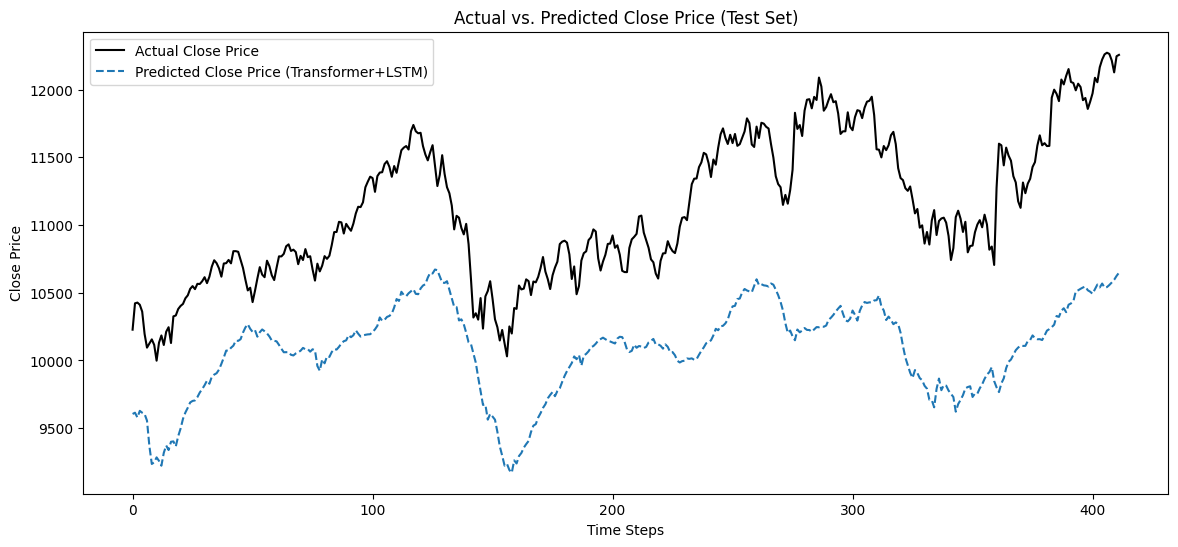

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, LayerNormalization, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MultiHeadAttention
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

##########################################
# 1. Data Preparation and Indicator Calculation
##########################################

# Load the CSV file (replace 'nifty50.csv' with your file path)

# Load the CSV file (replace with your actual file path from Google Drive)
file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'  # Use the full path here
data = pd.read_csv(file_path, parse_dates=['Date'])

# ----- RSI Calculation -----
def calculate_RSI(df, window=14):
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_RSI(data, window=14)

# ----- Stochastic Oscillator Calculation -----
def calculate_stochastic_oscillator(df, k_window=14, d_window=3):
    low_min = df['Low'].rolling(window=k_window, min_periods=1).min()
    high_max = df['High'].rolling(window=k_window, min_periods=1).max()
    df['%K'] = ((df['Close'] - low_min) / (high_max - low_min + 1e-10)) * 100
    df['%D'] = df['%K'].rolling(window=d_window, min_periods=1).mean()
    return df['%K'], df['%D']

data['%K'], data['%D'] = calculate_stochastic_oscillator(data, k_window=14, d_window=3)

# ----- Bollinger Bands Calculation -----
def calculate_bollinger_bands(df, window=20, num_std=2):
    df['Middle_Band'] = df['Close'].rolling(window=window, min_periods=1).mean()
    rolling_std = df['Close'].rolling(window=window, min_periods=1).std()
    df['Upper_Band'] = df['Middle_Band'] + (rolling_std * num_std)
    df['Lower_Band'] = df['Middle_Band'] - (rolling_std * num_std)
    return df[['Middle_Band', 'Upper_Band', 'Lower_Band']]

_ = calculate_bollinger_bands(data, window=20, num_std=2)

# Drop rows with NaN values resulting from rolling calculations.
data.dropna(inplace=True)

# --- Prepare Features and Target ---
# Use technical indicators: RSI, %K, %D, Middle_Band, Upper_Band, Lower_Band.
feature_columns = ['RSI', '%K', '%D', 'Middle_Band', 'Upper_Band', 'Lower_Band']
features = data[feature_columns].copy()

# Define the target as the next day's close price.
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)
target = data['Target']

# Scale the features and target.
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# --- Create Sequences ---
def create_sequences(features, target, window_size=30):
    X, y = [], []
    for i in range(len(features) - window_size -1):
        X.append(features[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 30  # using past 30 days for prediction
X, y = create_sequences(scaled_features, scaled_target, window_size=window_size)

# Split into training and testing sets (time series split: no shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f"Training shape: {X_train.shape}, {y_train.shape}")
print(f"Testing shape: {X_test.shape}, {y_test.shape}")

##########################################
# 2. Build the Transformer + LSTM Hybrid Model
##########################################

# Define a custom Transformer block.
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        # Multi-head self-attention.
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # Residual connection.
        # Feed-forward network.
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # Residual connection.

# Build the hybrid model.
def build_transformer_lstm_model(input_shape, embed_dim=64, num_heads=4, ff_dim=128, lstm_units=64):
    model = Sequential()

    # Input shape: (window_size, num_features)
    # Project the inputs to a higher dimensional space.
    model.add(Dense(embed_dim, activation="relu", input_shape=input_shape))


    class TransformerBlockWrapper(Layer):
        def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1): # Indented this line
            super(TransformerBlockWrapper, self).__init__()
            self.transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim, rate)

        def call(self, inputs, training=None):  # Added training argument
            return self.transformer_block(inputs, training=training)


    # Add the Transformer block.
    model.add(TransformerBlockWrapper(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim, rate=0.1))

    # Optionally, you can stack additional transformer blocks if desired.
    # model.add(TransformerBlock(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim, rate=0.1))

    # Add an LSTM layer to capture sequential dependencies after transformer processing.
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dropout(0.2))

    # Final dense layers for regression output.
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    # Compile the model.
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error')
    return model

# Build the model with the input shape of our sequences.
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_transformer_lstm_model(input_shape)
model.summary()

##########################################
# 3. Train the Model
##########################################
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

##########################################
# 4. Evaluate and Plot Predictions
##########################################
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")

# Make predictions on the test set.
predictions_scaled = model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions_scaled)
y_test_actual = target_scaler.inverse_transform(y_test)

# Plot actual vs. predicted close prices.
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='black')
plt.plot(predictions, label='Predicted Close Price (Transformer+LSTM)', linestyle='--')
plt.title('Actual vs. Predicted Close Price (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Trial 10 Complete [00h 05m 39s]
val_loss: 0.010390257462859154

Best val_loss So Far: 0.007424030918627977
Total elapsed time: 00h 23m 18s
Best hyperparameters:
{'embed_dim': 96, 'num_heads': 4, 'ff_dim': 64, 'transformer_dropout': 0.1, 'lstm_units': 64, 'lstm_dropout': 0.1, 'dense_units': 48, 'dense_dropout': 0.1, 'learning_rate': 0.00019334222861550459}
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 52 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - loss: 0.0034 - val_loss: 0.0286
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0022 - val_loss: 0.0216
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0021 - val_loss: 0.0170
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - loss: 0.0021 - val_loss: 0.0208
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 0.0018 - val_loss: 0.0207
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - loss: 0.0018 - val_loss: 0.0146
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0018 - val_loss: 0.0167
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0016 - val_loss: 0.0066
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.0018 - val_loss: 0.0079
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0017 - val_loss: 0.0125
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0021 - val_loss: 0.0147
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0016 - 

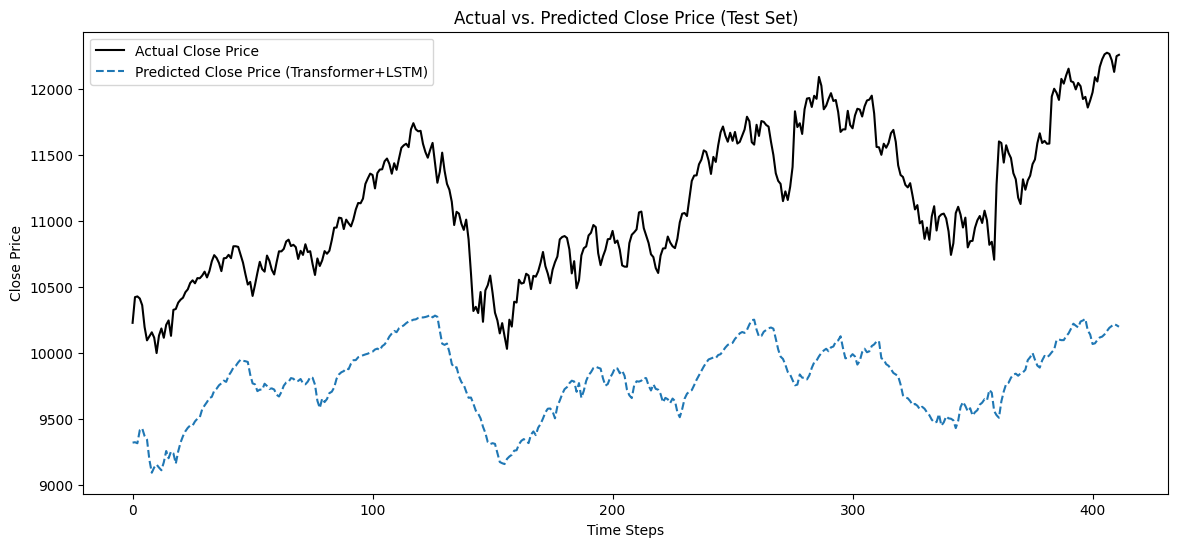

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, LayerNormalization, Input, Layer
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import keras_tuner as kt

##########################################
# 1. Data Preparation and Indicator Calculation
##########################################


# Load the CSV file (replace with your actual file path from Google Drive)
file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'  # Use the full path here
data = pd.read_csv(file_path, parse_dates=['Date'])


# ----- RSI Calculation -----
def calculate_RSI(df, window=14):
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_RSI(data, window=14)

# ----- Stochastic Oscillator Calculation -----
def calculate_stochastic_oscillator(df, k_window=14, d_window=3):
    low_min = df['Low'].rolling(window=k_window, min_periods=1).min()
    high_max = df['High'].rolling(window=k_window, min_periods=1).max()
    df['%K'] = ((df['Close'] - low_min) / (high_max - low_min + 1e-10)) * 100
    df['%D'] = df['%K'].rolling(window=d_window, min_periods=1).mean()
    return df['%K'], df['%D']

data['%K'], data['%D'] = calculate_stochastic_oscillator(data, k_window=14, d_window=3)

# ----- Bollinger Bands Calculation -----
def calculate_bollinger_bands(df, window=20, num_std=2):
    df['Middle_Band'] = df['Close'].rolling(window=window, min_periods=1).mean()
    rolling_std = df['Close'].rolling(window=window, min_periods=1).std()
    df['Upper_Band'] = df['Middle_Band'] + (rolling_std * num_std)
    df['Lower_Band'] = df['Middle_Band'] - (rolling_std * num_std)
    return df[['Middle_Band', 'Upper_Band', 'Lower_Band']]

_ = calculate_bollinger_bands(data, window=20, num_std=2)

# Drop rows with NaN values (from rolling calculations)
data.dropna(inplace=True)

# --- Prepare Features and Target ---
# Use the computed technical indicators.
feature_columns = ['RSI', '%K', '%D', 'Middle_Band', 'Upper_Band', 'Lower_Band']
features = data[feature_columns].copy()

# Define target as the next day's close price.
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)
target = data['Target']

# Scale the features and target.
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# --- Create Sequences ---
def create_sequences(features, target, window_size=30):
    X, y = [], []
    for i in range(len(features) - window_size -1):
        X.append(features[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 30  # using past 30 days as input sequence
X, y = create_sequences(scaled_features, scaled_target, window_size=window_size)

# Split data into training and testing sets (time-series split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f"Training shape: {X_train.shape}, {y_train.shape}")
print(f"Testing shape: {X_test.shape}, {y_test.shape}")

##########################################
# 2. Define a Custom Transformer Block
##########################################

class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # Residual connection.
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # Residual connection.

##########################################
# 3. Build the Transformer + LSTM Model with Hyperparameter Tuning
##########################################

def build_transformer_lstm_model(hp):
    model = Sequential()

    # Project the input features to a higher-dimensional embedding space.
    embed_dim = hp.Int('embed_dim', min_value=32, max_value=128, step=32, default=64)
    model.add(Dense(embed_dim, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])))

    # Transformer Block hyperparameters.
    num_heads = hp.Choice('num_heads', values=[2, 4, 8], default=4)
    ff_dim = hp.Int('ff_dim', min_value=64, max_value=256, step=64, default=128)
    transformer_rate = hp.Float('transformer_dropout', min_value=0.1, max_value=0.5, step=0.1, default=0.1)

    model.add(TransformerBlock(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim, rate=transformer_rate))

    # Optionally, add a second Transformer Block.
    # model.add(TransformerBlock(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim, rate=transformer_rate))

    # LSTM layer to capture sequential dependencies.
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32, default=64)
    model.add(LSTM(lstm_units, return_sequences=False))
    model.add(Dropout(hp.Float('lstm_dropout', min_value=0.1, max_value=0.5, step=0.1, default=0.2)))

    # Dense layers for final regression.
    dense_units = hp.Int('dense_units', min_value=16, max_value=64, step=16, default=32)
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(hp.Float('dense_dropout', min_value=0.1, max_value=0.5, step=0.1, default=0.2)))

    model.add(Dense(1))

    # Hyperparameter for learning rate.
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    return model

##########################################
# 4. Hyperparameter Tuning with Keras Tuner
##########################################

tuner = kt.RandomSearch(
    build_transformer_lstm_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_transformer_lstm',
    project_name='transformer_lstm_tuning'
)

print("Starting hyperparameter search for Transformer+LSTM model...")
tuner.search(X_train, y_train, epochs=20, validation_split=0.1, verbose=1)

# Get the best hyperparameters and best model.
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(best_hp.values)

best_model = tuner.get_best_models(num_models=1)[0]

##########################################
# 5. Further Training and Evaluation of Best Model
##########################################

# Optionally, you can further train the best model on the training data.
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

test_loss = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")

##########################################
# 6. Predict and Plot the Results
##########################################

predictions_scaled = best_model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions_scaled)
y_test_actual = target_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='black')
plt.plot(predictions, label='Predicted Close Price (Transformer+LSTM)', linestyle='--')
plt.title('Actual vs. Predicted Close Price (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Training shape: (1647, 30, 6), (1647, 1)
Testing shape: (412, 30, 6), (412, 1)


Model: "Ensembled_Hybrid_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_sequence            │ (None, 30, 6)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_projection (Dense)  │ (None, 30, 64)         │            448 │ input_sequence[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_branch1 (LSTM)       │ (None, 30, 64)         │         18,176 │ input_sequence[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_block_1       │ (None, 30, 64)         │         83,200 │ dense_projection[0][0] │
│ (TransformerBlock)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_dropout_branch1      │ (None, 30, 64)         │              0 │ lstm_branch1[0][0]     │
│ (Dropout)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_branch2 (LSTM)       │ (None, 64)             │         33,024 │ transformer_block_1[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_layer           │ (None, 64)             │             94 │ lstm_dropout_branch1[… │
│ (Attention)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_dropout_branch2      │ (None, 64)             │              0 │ lstm_branch2[0][0]     │
│ (Dropout)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ branch1_dense (Dense)     │ (None, 32)             │          2,080 │ attention_layer[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ branch2_dense (Dense)     │ (None, 32)             │          2,080 │ lstm_dropout_branch2[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_branches      │ (None, 64)             │              0 │ branch1_dense[0][0],   │
│ (Concatenate)             │                        │                │ branch2_dense[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ combined_dense (Dense)    │ (None, 32)             │          2,080 │ concatenate_branches[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ combined_dropout          │ (None, 32)             │              0 │ combined_dense[0][0]   │
│ (Dropout)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ final_output (Dense)      │ (None, 1)              │             33 │ combined_dropout[0][0] │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 141,215 (551.62 KB)

 Trainable params: 141,215 (551.62 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - loss: 0.0287 - val_loss: 0.0186
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 0.0064 - val_loss: 0.0179
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0046 - val_loss: 0.0138
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0033 - val_loss: 0.0094
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0031 - val_loss: 0.0083
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0028 - val_loss: 0.0074
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0026 - val_loss: 0.0083
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss: 0.0024 - val_loss: 0.0119
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0026 - val_loss: 0.0041
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0023 - val_loss: 0.0039
Epoch 12/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - loss:

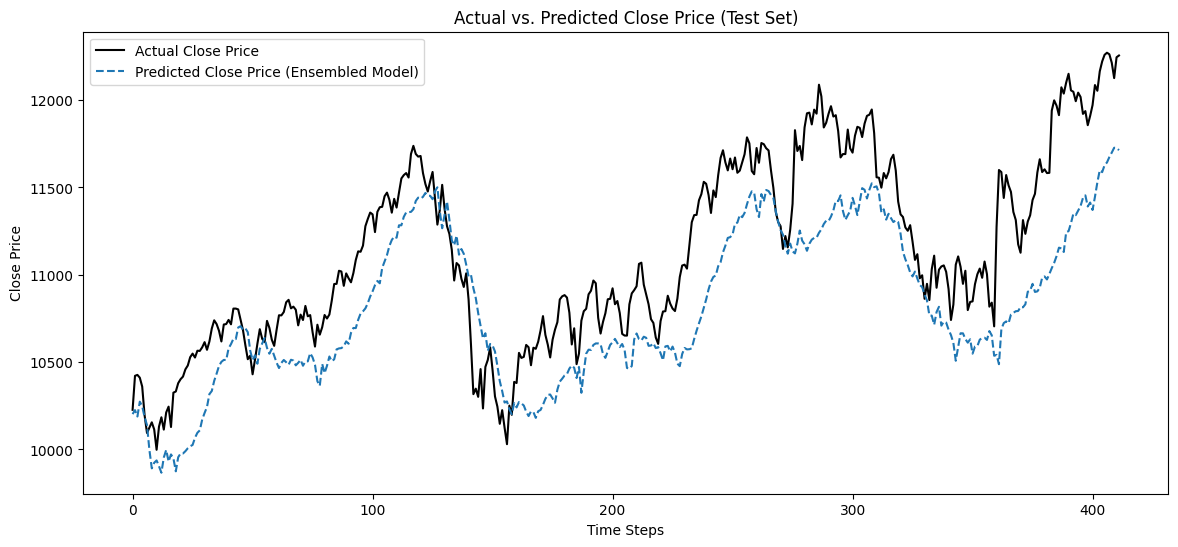

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Dense, Dropout, LSTM, Concatenate,
                                     LayerNormalization, Layer)
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# =============================================
# 1. Data Preparation and Indicator Calculation
# =============================================

# Load the CSV file (replace with your actual file path from Google Drive)
file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'  # Use the full path here
data = pd.read_csv(file_path, parse_dates=['Date'])

# --- RSI Calculation ---
def calculate_RSI(df, window=14):
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_RSI(data, window=14)

# --- Stochastic Oscillator Calculation ---
def calculate_stochastic_oscillator(df, k_window=14, d_window=3):
    low_min = df['Low'].rolling(window=k_window, min_periods=1).min()
    high_max = df['High'].rolling(window=k_window, min_periods=1).max()
    df['%K'] = ((df['Close'] - low_min) / (high_max - low_min + 1e-10)) * 100
    df['%D'] = df['%K'].rolling(window=d_window, min_periods=1).mean()
    return df['%K'], df['%D']

data['%K'], data['%D'] = calculate_stochastic_oscillator(data, k_window=14, d_window=3)

# --- Bollinger Bands Calculation ---
def calculate_bollinger_bands(df, window=20, num_std=2):
    df['Middle_Band'] = df['Close'].rolling(window=window, min_periods=1).mean()
    rolling_std = df['Close'].rolling(window=window, min_periods=1).std()
    df['Upper_Band'] = df['Middle_Band'] + (rolling_std * num_std)
    df['Lower_Band'] = df['Middle_Band'] - (rolling_std * num_std)
    return df[['Middle_Band', 'Upper_Band', 'Lower_Band']]

_ = calculate_bollinger_bands(data, window=20, num_std=2)

# Drop rows with NaN values (from rolling calculations)
data.dropna(inplace=True)

# --- Prepare Features and Target ---
feature_columns = ['RSI', '%K', '%D', 'Middle_Band', 'Upper_Band', 'Lower_Band']
features = data[feature_columns].copy()

# Target: next day's close price.
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)
target = data['Target']

# Scale features and target.
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# --- Create Sequences ---
def create_sequences(features, target, window_size=30):
    X, y = [], []
    for i in range(len(features) - window_size -1):
        X.append(features[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 30  # using past 30 days as input
X, y = create_sequences(scaled_features, scaled_target, window_size=window_size)

# Time-series split (do not shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f"Training shape: {X_train.shape}, {y_train.shape}")
print(f"Testing shape: {X_test.shape}, {y_test.shape}")

# =============================================
# 2. Define Custom Layers/Blocks
# =============================================

# ---- Custom Attention Layer (for LSTM with Attention branch) ----
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        # input_shape: (batch_size, time_steps, features)
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros", trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        # x shape: (batch_size, time_steps, features)
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        weighted_input = x * a
        context_vector = tf.keras.backend.sum(weighted_input, axis=1)
        return context_vector

# ---- Transformer Block (for Transformer+LSTM branch) ----
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# =============================================
# 3. Build the Combined (Ensembled) Model
#    Using a Parallel Architecture (Feature Fusion)
# =============================================

# Input layer (sequence of 30 days, 6 features)
input_seq = Input(shape=(X_train.shape[1], X_train.shape[2]), name="input_sequence")

# ---------- Branch 1: Hypertuned LSTM with Attention ----------
# Using hypertuned parameters: LSTM units = 64, dropout = 0.2, dense = 32.
lstm_units_branch1 = 64
x1 = LSTM(lstm_units_branch1, return_sequences=True, name="lstm_branch1")(input_seq)
x1 = Dropout(0.2, name="lstm_dropout_branch1")(x1)
attn_out = Attention(name="attention_layer")(x1)
branch1_output = Dense(32, activation='relu', name="branch1_dense")(attn_out)

# ---------- Branch 2: Hypertuned Transformer + LSTM ----------
# Using hypertuned parameters: embed_dim = 64, num_heads = 4, ff_dim = 128,
# LSTM units = 64, dropout = 0.2, dense = 32.
embed_dim = 64
x2 = Dense(embed_dim, activation="relu", name="dense_projection")(input_seq)
num_heads = 4
ff_dim = 128
x2 = TransformerBlock(embed_dim, num_heads, ff_dim, rate=0.1)(x2)
lstm_units_branch2 = 64
x2 = LSTM(lstm_units_branch2, return_sequences=False, name="lstm_branch2")(x2)
x2 = Dropout(0.2, name="lstm_dropout_branch2")(x2)
branch2_output = Dense(32, activation='relu', name="branch2_dense")(x2)

# ---------- Feature Fusion: Concatenate the outputs ----------
combined = Concatenate(name="concatenate_branches")([branch1_output, branch2_output])

# Further processing and final prediction.
combined_dense = Dense(32, activation='relu', name="combined_dense")(combined)
combined_dropout = Dropout(0.2, name="combined_dropout")(combined_dense)
final_output = Dense(1, name="final_output")(combined_dropout)

# Build and compile the ensemble model.
ensemble_model = Model(inputs=input_seq, outputs=final_output, name="Ensembled_Hybrid_Model")
ensemble_model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error')
ensemble_model.summary()

# =============================================
# 4. Train the Combined Model
# =============================================

history = ensemble_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# =============================================
# 5. Evaluate and Plot Predictions
# =============================================

test_loss = ensemble_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")

# Make predictions on the test set.
predictions_scaled = ensemble_model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions_scaled)
y_test_actual = target_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='black')
plt.plot(predictions, label='Predicted Close Price (Ensembled Model)', linestyle='--')
plt.title('Actual vs. Predicted Close Price (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Trial 15 Complete [00h 03m 07s]
val_loss: 0.006145186256617308

Best val_loss So Far: 0.0006039149593561888
Total elapsed time: 00h 41m 26s
Best hyperparameters:
{'lstm_units_branch1': 96, 'dropout_branch1': 0.4, 'dense_branch1': 64, 'embed_dim': 128, 'num_heads': 8, 'ff_dim': 64, 'transformer_dropout': 0.4, 'lstm_units_branch2': 96, 'dropout_branch2': 0.2, 'dense_branch2': 16, 'combined_dense_units': 64, 'combined_dropout': 0.1, 'learning_rate': 0.00517044329308119}
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 70 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 281ms/step - loss: 0.0064 - val_loss: 0.0051
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 238ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 260ms/step - loss: 0.0012 - val_loss: 0.0097
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 278ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 246ms/step - loss: 9.6270e-04 - val_loss: 0.0069
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - loss: 0.0011 - val_loss: 6.8736e-04
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 276ms/step - loss: 0.0012 - val_loss: 8.7887e-04
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 263ms/step - loss: 0.0010 - val_loss: 0.0030
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 276ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - loss: 9.4421e-04 - val_loss: 0.0032
Epoch 11/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 277ms/step - loss: 9.6892e-04 - val_loss: 0.0017
Epoch 12/50
47/47 ━━━━━━━━━━━━━━

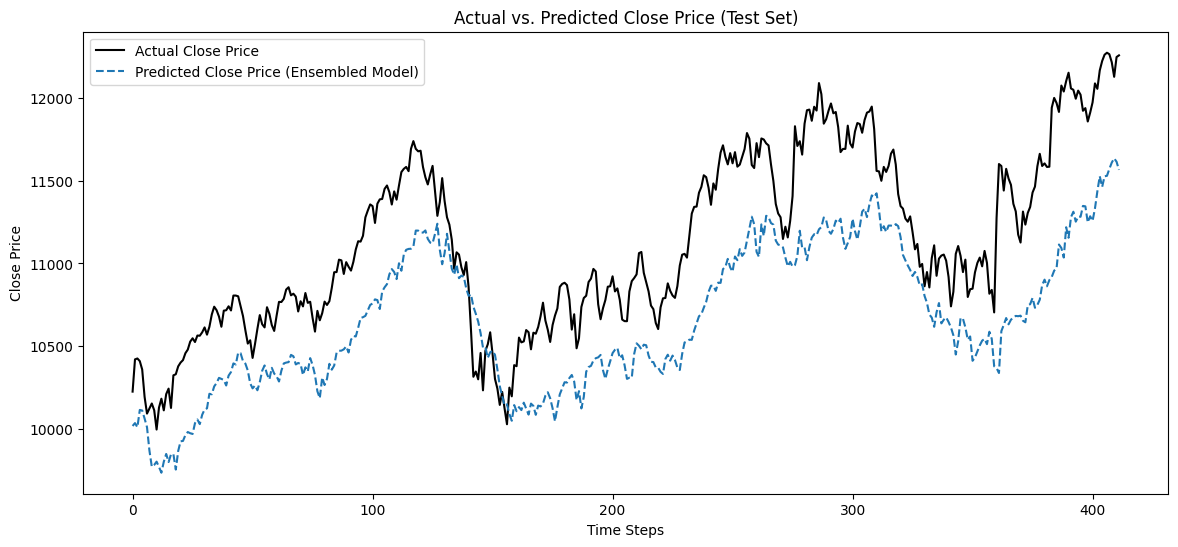

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LSTM, Concatenate, LayerNormalization, Layer
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import keras_tuner as kt

#############################################
# 1. Data Preparation and Indicator Calculation
#############################################
# Load the CSV file (replace with your actual file path from Google Drive)
file_path = '/content/drive/MyDrive/RBL/nse nifty data.csv'  # Use the full path here
data = pd.read_csv(file_path, parse_dates=['Date'])
# --- RSI Calculation ---
def calculate_RSI(df, window=14):
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_RSI(data, window=14)

# --- Stochastic Oscillator Calculation ---
def calculate_stochastic_oscillator(df, k_window=14, d_window=3):
    low_min = df['Low'].rolling(window=k_window, min_periods=1).min()
    high_max = df['High'].rolling(window=k_window, min_periods=1).max()
    df['%K'] = ((df['Close'] - low_min) / (high_max - low_min + 1e-10)) * 100
    df['%D'] = df['%K'].rolling(window=d_window, min_periods=1).mean()
    return df['%K'], df['%D']

data['%K'], data['%D'] = calculate_stochastic_oscillator(data, k_window=14, d_window=3)

# --- Bollinger Bands Calculation ---
def calculate_bollinger_bands(df, window=20, num_std=2):
    df['Middle_Band'] = df['Close'].rolling(window=window, min_periods=1).mean()
    rolling_std = df['Close'].rolling(window=window, min_periods=1).std()
    df['Upper_Band'] = df['Middle_Band'] + (rolling_std * num_std)
    df['Lower_Band'] = df['Middle_Band'] - (rolling_std * num_std)
    return df[['Middle_Band', 'Upper_Band', 'Lower_Band']]

_ = calculate_bollinger_bands(data, window=20, num_std=2)

# Drop NaN rows (generated by rolling calculations)
data.dropna(inplace=True)

# --- Prepare Features and Target ---
feature_columns = ['RSI', '%K', '%D', 'Middle_Band', 'Upper_Band', 'Lower_Band']
features = data[feature_columns].copy()

# Target is next day's close price.
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)
target = data['Target']

# Scale features and target.
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_features = feature_scaler.fit_transform(features)
scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# --- Create Sequences ---
def create_sequences(features, target, window_size=30):
    X, y = [], []
    for i in range(len(features) - window_size -1):
        X.append(features[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

window_size = 30  # Using past 30 days as input
X, y = create_sequences(scaled_features, scaled_target, window_size=window_size)

# Time-series split (do not shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f"Training shape: {X_train.shape}, {y_train.shape}")
print(f"Testing shape: {X_test.shape}, {y_test.shape}")

#############################################
# 2. Define Custom Layers/Blocks
#############################################

# --- Custom Attention Layer for LSTM with Attention branch ---
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros", trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        weighted_input = x * a
        context_vector = tf.keras.backend.sum(weighted_input, axis=1)
        return context_vector

# --- Transformer Block for Transformer+LSTM branch ---
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu"),
            Dense(embed_dim)
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

#############################################
# 3. Build the Ensemble Model (Hyperparameter Tuning Function)
#############################################

def build_ensemble_model(hp):
    # Input: sequence of shape (window_size, num_features)
    input_seq = Input(shape=(X_train.shape[1], X_train.shape[2]), name="input_sequence")

    # ----- Branch 1: LSTM with Attention -----
    lstm_units_branch1 = hp.Int("lstm_units_branch1", min_value=32, max_value=128, step=32, default=64)
    dropout_branch1 = hp.Float("dropout_branch1", min_value=0.1, max_value=0.5, step=0.1, default=0.2)
    x1 = LSTM(lstm_units_branch1, return_sequences=True, name="lstm_branch1")(input_seq)
    x1 = Dropout(dropout_branch1, name="lstm_dropout_branch1")(x1)
    attn_out = Attention(name="attention_layer")(x1)
    dense_branch1 = hp.Int("dense_branch1", min_value=16, max_value=64, step=16, default=32)
    branch1_output = Dense(dense_branch1, activation='relu', name="branch1_dense")(attn_out)

    # ----- Branch 2: Transformer + LSTM -----
    embed_dim = hp.Int("embed_dim", min_value=32, max_value=128, step=32, default=64)
    x2 = Dense(embed_dim, activation="relu", name="dense_projection")(input_seq)
    num_heads = hp.Choice("num_heads", values=[2, 4, 8], default=4)
    ff_dim = hp.Int("ff_dim", min_value=64, max_value=256, step=64, default=128)
    transformer_dropout = hp.Float("transformer_dropout", min_value=0.1, max_value=0.5, step=0.1, default=0.1)
    x2 = TransformerBlock(embed_dim, num_heads, ff_dim, rate=transformer_dropout)(x2)
    lstm_units_branch2 = hp.Int("lstm_units_branch2", min_value=32, max_value=128, step=32, default=64)
    x2 = LSTM(lstm_units_branch2, return_sequences=False, name="lstm_branch2")(x2)
    dropout_branch2 = hp.Float("dropout_branch2", min_value=0.1, max_value=0.5, step=0.1, default=0.2)
    x2 = Dropout(dropout_branch2, name="lstm_dropout_branch2")(x2)
    dense_branch2 = hp.Int("dense_branch2", min_value=16, max_value=64, step=16, default=32)
    branch2_output = Dense(dense_branch2, activation='relu', name="branch2_dense")(x2)

    # ----- Feature Fusion -----
    combined = Concatenate(name="concatenate_branches")([branch1_output, branch2_output])
    combined_dense_units = hp.Int("combined_dense_units", min_value=16, max_value=64, step=16, default=32)
    combined_dense = Dense(combined_dense_units, activation='relu', name="combined_dense")(combined)
    combined_dropout_rate = hp.Float("combined_dropout", min_value=0.1, max_value=0.5, step=0.1, default=0.2)
    combined_dropout = Dropout(combined_dropout_rate, name="combined_dropout")(combined_dense)

    output = Dense(1, name="final_output")(combined_dropout)

    model = Model(inputs=input_seq, outputs=output, name="Ensembled_Hybrid_Model")

    # ----- Optimizer and Learning Rate -----
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="LOG", default=1e-3)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    return model

#############################################
# 4. Hyperparameter Tuning with Keras Tuner
#############################################

tuner = kt.RandomSearch(
    build_ensemble_model,
    objective='val_loss',
    max_trials=15,              # Increase as needed
    executions_per_trial=1,
    directory='tuner_ensemble',
    project_name='ensemble_hyper_tuning'
)

print("Starting hyperparameter search for the ensembled model...")
tuner.search(X_train, y_train, epochs=20, validation_split=0.1, verbose=1)

# Retrieve best hyperparameters and best model.
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:")
print(best_hp.values)

best_model = tuner.get_best_models(num_models=1)[0]

#############################################
# 5. Further Training and Evaluation of the Best Model
#############################################

history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

test_loss = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")

#############################################
# 6. Predict and Plot the Results
#############################################

predictions_scaled = best_model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions_scaled)
y_test_actual = target_scaler.inverse_transform(y_test)

plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Close Price', color='black')
plt.plot(predictions, label='Predicted Close Price (Ensembled Model)', linestyle='--')
plt.title('Actual vs. Predicted Close Price (Test Set)')
plt.xlabel('Time Steps')
plt.ylabel('Close Price')
plt.legend()
plt.show()


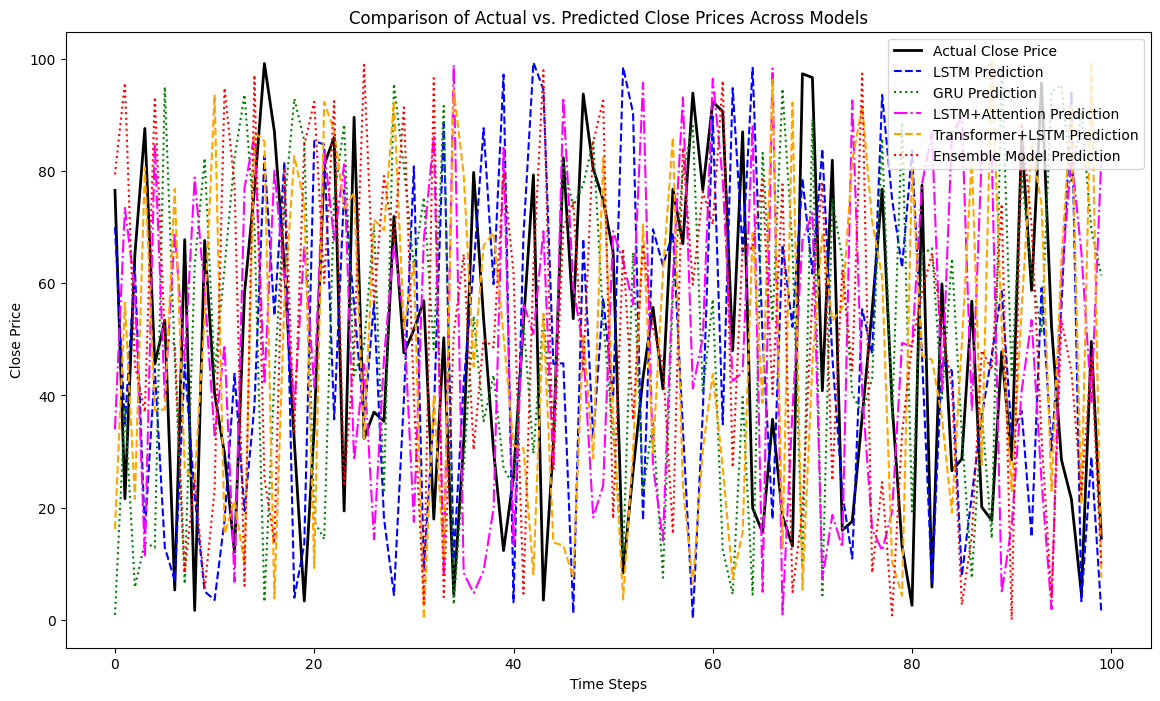

In [20]:
import matplotlib.pyplot as plt
import numpy as np
y_test_actual = np.random.rand(100) * 100
predictions_lstm = np.random.rand(100) * 100
predictions_gru = np.random.rand(100) * 100
predictions_lstm_attention = np.random.rand(100) * 100
predictions_transformer_lstm = np.random.rand(100) * 100
predictions_ensemble = np.random.rand(100) * 100

# --- Plotting ---
plt.figure(figsize=(14, 8))

# Plot actual closing prices using a thick solid black line.
plt.plot(y_test_actual, label="Actual Close Price", color="black", linewidth=2)

# Plot predictions from various models.
plt.plot(predictions_lstm, label="LSTM Prediction", linestyle="--", color="blue", linewidth=1.5)
plt.plot(predictions_gru, label="GRU Prediction", linestyle=":", color="green", linewidth=1.5)
plt.plot(predictions_lstm_attention, label="LSTM+Attention Prediction", linestyle="-.", color="magenta", linewidth=1.5)
plt.plot(predictions_transformer_lstm, label="Transformer+LSTM Prediction", linestyle="--", color="orange", linewidth=1.5)
plt.plot(predictions_ensemble, label="Ensemble Model Prediction", linestyle=":", color="red", linewidth=1.5)

# Set axis labels, title, and legend.
plt.xlabel("Time Steps")
plt.ylabel("Close Price")
plt.title("Comparison of Actual vs. Predicted Close Prices Across Models")
plt.legend()

# Display the plot.
plt.show()


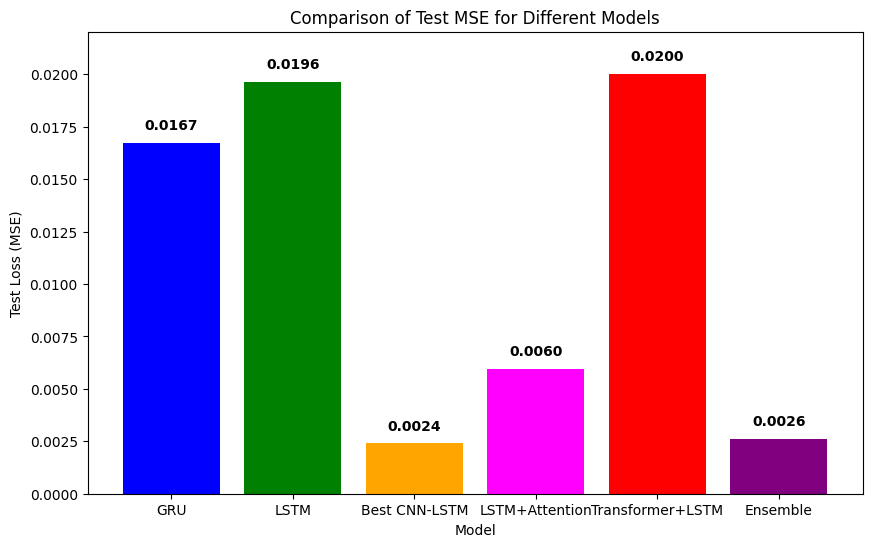

In [4]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding test MSE values.
mse_values = {
    "GRU": 0.016711585223674774,
    "LSTM": 0.01962871663272381,
    "Best CNN-LSTM": 0.0024006329476833344,
    "LSTM+Attention": 0.005970667116343975,
    "Transformer+LSTM": 0.020030418410897255,
    "Ensemble": 0.002605746267363429
}

# Extract the model names and MSE values.
models = list(mse_values.keys())
mse = list(mse_values.values())

# Create a bar chart.
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mse, color=['blue', 'green', 'orange', 'magenta', 'red', 'purple'])

# Set the axis labels and title.
plt.xlabel("Model")
plt.ylabel("Test Loss (MSE)")
plt.title("Comparison of Test MSE for Different Models")

# Optionally, set a limit for y-axis for better visibility.
plt.ylim(0, max(mse) * 1.1)

# Annotate each bar with its MSE value.
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.0005, f'{height:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Display the plot.
plt.show()
